In [90]:
import matplotlib.pyplot as plt
import numpy as np

In [174]:
L = 0.02
m = 10
n = 10
point_num = m * n

x = np.linspace(0, L, n)
y = np.linspace(0, L, m)

grid = np.meshgrid(x, y)

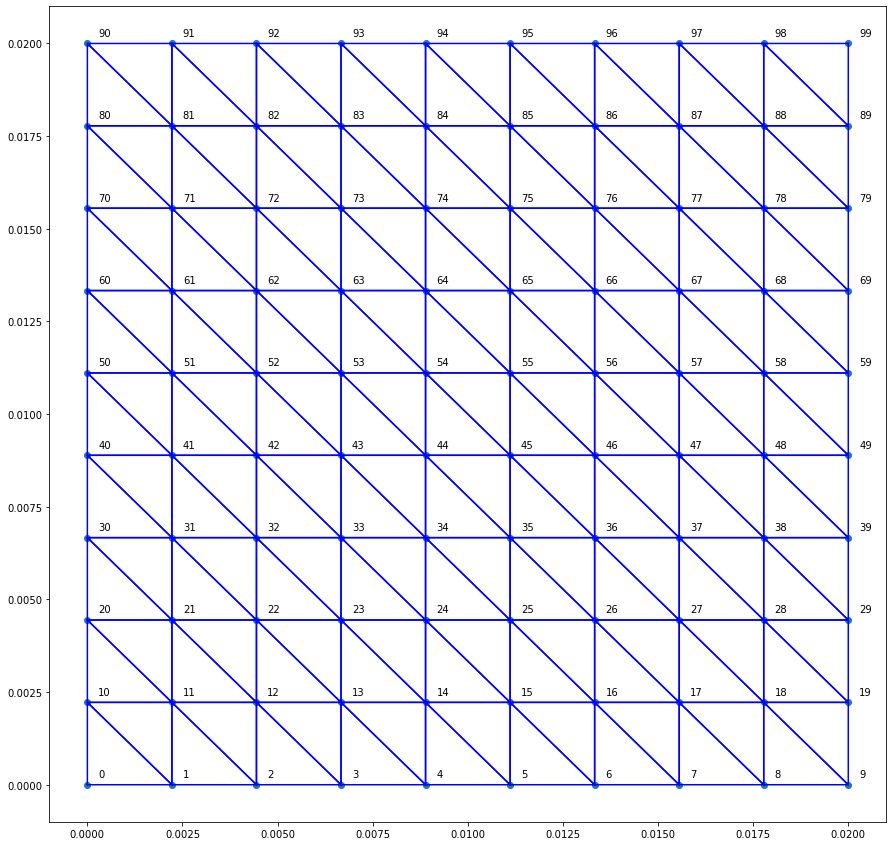

In [175]:
# Storing the coordinates of the points in a numpy array
points = np.zeros((point_num, 2))
for i in range(point_num):
    points[i, 0], points[i, 1] = grid[0].flatten()[i], grid[1].flatten()[i]
    
# Storing the points that form a cell in an array (1. points opposing the hypothenuse, numbering counterclockwise)
cells = np.zeros(((n-1)*(m-1)*2, 3), dtype=np.int16)
j = 0
for i in range((n-1)*(m-1)*2):
    if i % 2 == 0:
        cells[i][0], cells[i][1], cells[i][2] = j, j + 1, j + n
        j += n + 1
    else:
        cells[i][0], cells[i][1], cells[i][2] = j, j - 1, j - n
        if (i + 1) % (2 * (n - 1)) == 0:
            j = j - n + 1
        else:
            j -= n
          
        
# Plotting
plt.figure(figsize=(15, 15))

# Scatterplot of the points
plt.scatter(points.transpose()[0], points.transpose()[1])

# Connecting the points to form the cells
x_c = points.transpose()[0]
y_c = points.transpose()[1]
for i in cells:
    plt.plot([x_c[i[0]], x_c[i[1]], x_c[i[2]], x_c[i[0]]], [y_c[i[0]], y_c[i[1]], y_c[i[2]], y_c[i[0]]], color='b')

# Annotating the points in the grid
for i in range(point_num):
    plt.annotate(i, (points.transpose()[0][i]+L/70, points.transpose()[1][i]+L/100))
    

plt.show()

### Find the local basis functions of the gridpoint

In [176]:
def D(point, cell):
    if point in cells[cell]:
        return np.where(cells[cell] == point)[0][0]
    else:
        return -1

In [180]:
D(15, 11)

1

In [149]:
def transform(point, vertecies, inverse = False):
    if inverse == False:
        A = np.zeros((2, 2))
        A[0, 0] = points[vertex[1]][0] - points[vertex[0]][0]
        A[0, 1] = points[vertex[2]][0] - points[vertex[0]][0]
        A[1, 0] = points[vertex[1]][1] - points[vertex[0]][1]
        A[1, 1] = points[vertex[2]][1] - points[vertex[0]][1]
        print(A)
        b = np.array([points[vertex[0]][0], points[vertex[0]][1]])
        return np.dot(A, point) + b
    else:
        

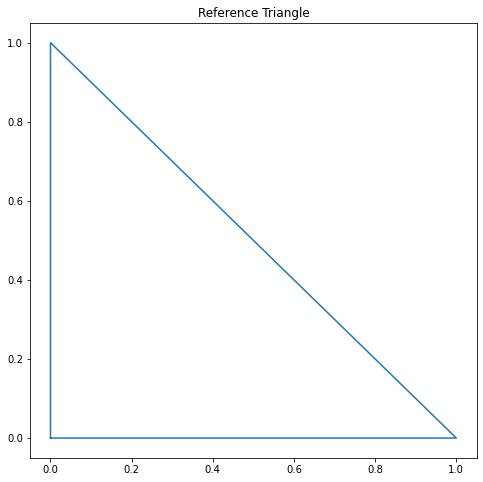

In [54]:
plt.figure(figsize=(8, 8))
plt.plot([P0[0], P1[0], P2[0], P0[0]], [P0[1], P1[1], P2[1], P0[1]])
plt.title('Reference Triangle')
plt.show()

### Transformation

In [84]:
phi0 = lambda x, y: 1 - x - y
phi1 = lambda x, y: x
phi2 = lambda x, y: y
basis_funcs = [phi0, phi1, phi1]

In [86]:
basis_funcs[0](0, 0)

1

In [ ]:
A = [[a1 - a0, a2 - a0],
     [a1 - a0, a2 - a0]]
b = [a0,
    a0]

F(x, y) = A * [x, y] + b

### Transform functions from reference to grid cell

In [17]:
Finv = 1/det(A) * Ainv

NameError: name 'det' is not defined

In [ ]:
gradphi = Ainv * gradphihat(FTinv)